In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df_tracks = pd.read_csv('tracks.csv')

In [ ]:
df_tracks

In [ ]:
df_tracks.head()

In [ ]:
#null values
pd.isnull(df_tracks).sum()

In [ ]:
df_tracks.info()

In [ ]:
sorted_df = df_tracks.sort_values('popularity',ascending = True).head(10)
sorted_df

In [ ]:
df_tracks.describe().transpose()

In [ ]:
most_popular = df_tracks.query('popularity>90',inplace = False).sort_values('popularity',ascending = False)
most_popular[:10]

In [ ]:
df_tracks.set_index("release_date",inplace=True)
df_tracks.index=pd.to_datetime(df_tracks.index)
df_tracks.head()

In [ ]:
df_tracks[["artists"]].iloc[18]

In [ ]:
df_tracks["duration"]=df_tracks["duration_ms"].apply(lambda x: round(x/1000))
df_tracks.drop("duration_ms",inplace=True,axis=1)

In [ ]:
df_tracks.duration.head()

In [ ]:
corr_df = df_tracks.drop(["key", "mode", "explicit"], axis=1).corr(method="pearson")

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [ ]:
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))

In [ ]:
print(len(sample_df))

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=sample_df, y="loudness", x="energy", color="b")

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data = sample_df, y = "popularity", x="acousticness")
plt.show()

In [28]:

df_tracks['dates'] = df_tracks.index.get_level_values('release_date')
df_tracks['dates'] = pd.to_datetime(df_tracks['dates'])
years = df_tracks['dates'].dt.year


In [29]:
#pip install..user seaborn==0.11.0

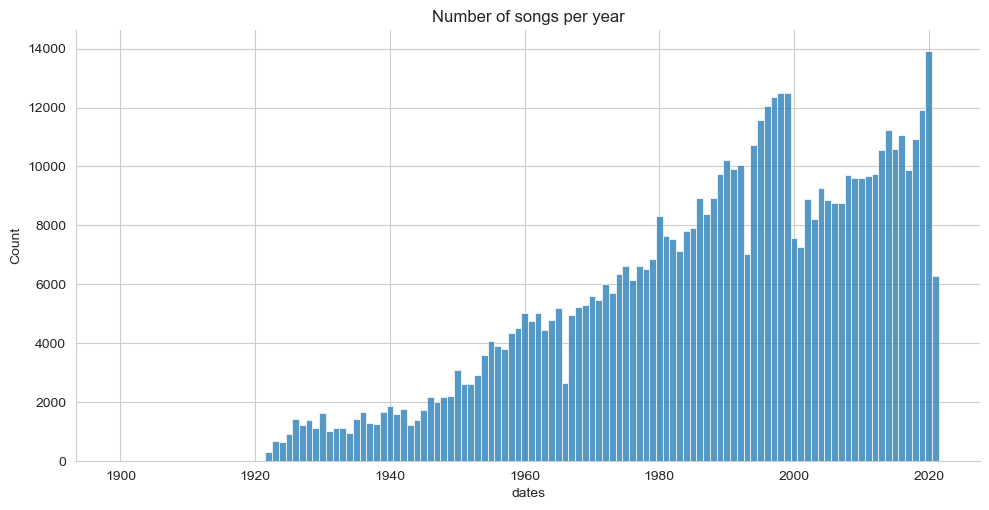

In [30]:
sns.displot(years, discrete=True, aspect=2, height=5, kde_kws={"discrete": True})
plt.title("Number of songs per year")
plt.show()

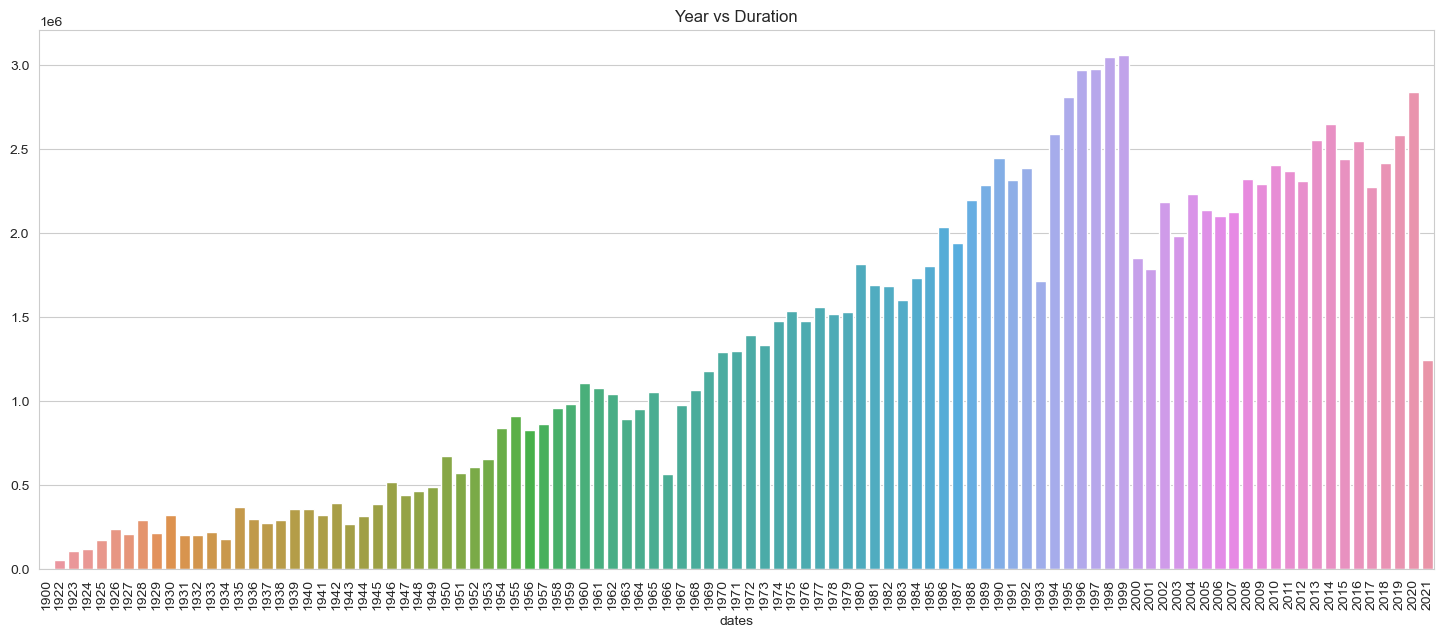

In [31]:
total_dr = df_tracks.groupby(years)['duration'].sum()

fig_dims = (18, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=total_dr.index, y=total_dr.values, ax=ax, errwidth=False)
plt.title("Year vs Duration")
plt.xticks(rotation=90)
plt.show()

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

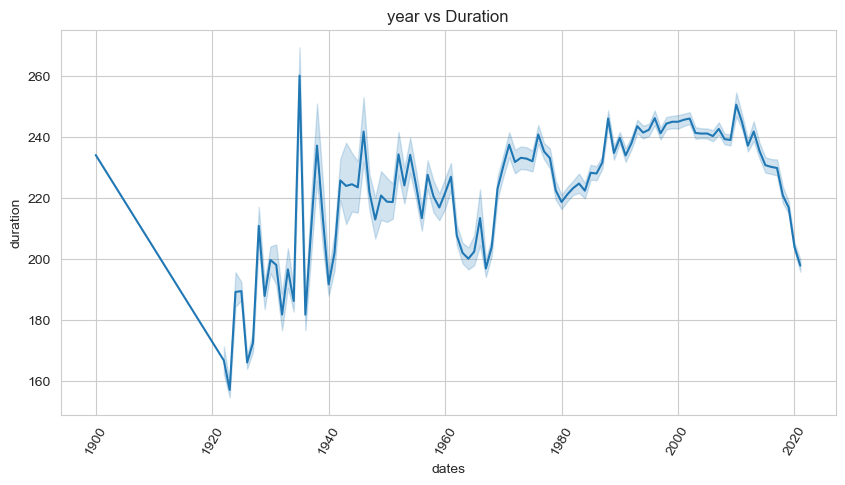

In [32]:
total_dr=df_tracks.duration
sns.set_style(style="whitegrid")
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=years, y=total_dr,ax=ax).set(title="year vs Duration")
plt.xticks(rotation=60)

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

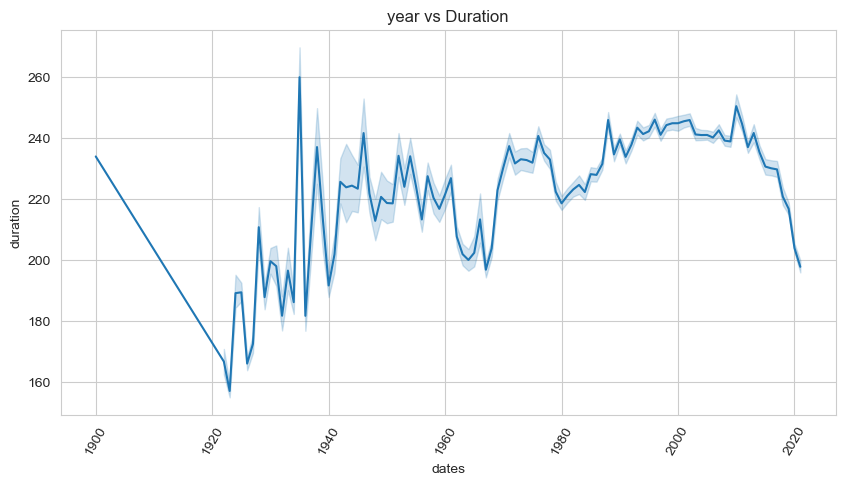

In [33]:
total_dr=df_tracks.duration
sns.set_style(style="whitegrid")
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=years, y=total_dr,ax=ax).set(title="year vs Duration")
plt.xticks(rotation=60)

In [34]:
df_genre=pd.read_csv(r"C:\Users\Admin 19\Downloads\project1\SpotifyFeatures.csv")

In [35]:
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Text(0, 0.5, 'Genres')

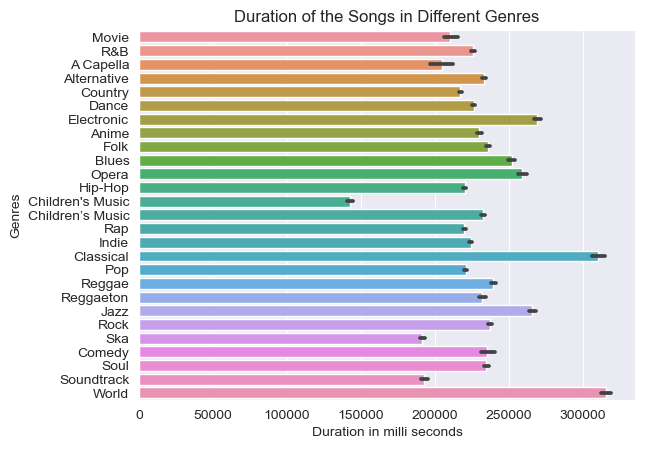

In [39]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket", as_cmap= True)
sns.barplot(y='genre', x='duration_ms', data=df_genre)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")

[Text(0.5, 1.0, 'Top 5 Tracks by Popularity')]

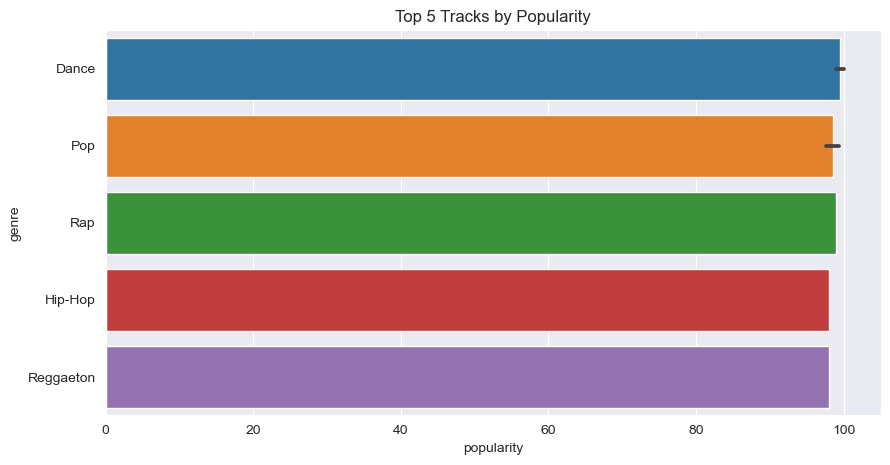

In [38]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = df_genre.sort_values("popularity", ascending = False).head(10)
sns.barplot(y='genre', x='popularity', data = famous).set(title= "Top 5 Tracks by Popularity")

In [ ]:
pip install --user seaborn==0.11.0